# Handling Parquet Files with Python

In [10]:
import pandas as pd
import numpy as np

In [11]:
# Generate sample data
np.random.seed(42)
data = {
    'id': np.arange(1, 1001),
    'name': np.random.choice(['Alice', 'Bob', 'Charlie', 'David', 'Eva'], 1000),
    'surname': np.random.choice(['Smith', 'Johnson', 'Williams', 'Jones', 'Brown'], 1000),
    'email': [f'user{i}@example.com' for i in range(1, 1001)],
    'address': np.random.choice(['123 Main St', '456 Oak St', '789 Pine St', '101 Maple St'], 1000)
}

# Create DataFrame
df = pd.DataFrame(data)

In [12]:
df.sample(10)

,id,name,surname,email,address
94,95,Alice,Williams,user95@example.com,789 Pine St
409,410,David,Smith,user410@example.com,101 Maple St
38,39,Alice,Johnson,user39@example.com,456 Oak St
863,864,Bob,Brown,user864@example.com,101 Maple St
242,243,Alice,Williams,user243@example.com,101 Maple St
70,71,Alice,Brown,user71@example.com,123 Main St
531,532,Bob,Jones,user532@example.com,456 Oak St
902,903,Eva,Johnson,user903@example.com,789 Pine St
605,606,Charlie,Smith,user606@example.com,456 Oak St
412,413,Eva,Jones,user413@example.com,456 Oak St


In [13]:
# Save to Excel and Parquet files
df.to_excel('users_info.xlsx', index=False)
df.to_parquet('users_info.parquet', index=False)

In [15]:
import time

# Read and time Excel
start_time = time.time()
df_excel = pd.read_excel('users_info.xlsx')
excel_time = time.time() - start_time
print(f"Time to load Excel file: {excel_time:.4f} seconds")

# Read and time Parquet
start_time = time.time()
df_parquet = pd.read_parquet('users_info.parquet')
parquet_time = time.time() - start_time
print(f"Time to load Parquet file: {parquet_time:.4f} seconds")

# Compare DataFrame sizes
print(f"Excel file size: {df_excel.memory_usage(deep=True).sum() / (1024 * 1024):.2f} MB")
print(f"Parquet file size: {df_parquet.memory_usage(deep=True).sum() / (1024 * 1024):.2f} MB")


Time to load Excel file: 0.0707 seconds
Time to load Parquet file: 0.0024 seconds
Excel file size: 0.26 MB
Parquet file size: 0.26 MB


# Advantages of Columnar Formats Like Parquet

Columnar formats such as Parquet store data by columns instead of rows. This provides several advantages for analytical tasks:

- **Faster Queries**: When only specific columns are needed, columnar formats read only those columns, reducing I/O.
- **Efficient Compression**: Similar data types in a column compress better.
- **Improved Performance in Distributed Systems**: Optimized for big data frameworks like Spark.


In [16]:
import timeit
import pandas as pd

# Test query time for Excel
def query_excel():
    df = pd.read_excel('users_info.xlsx')
    return df[df['name'] == 'Alice']

excel_query_time = timeit.timeit(query_excel, number=10) / 10

# Test query time for Parquet
def query_parquet():
    df = pd.read_parquet('users_info.parquet')
    return df[df['name'] == 'Alice']

parquet_query_time = timeit.timeit(query_parquet, number=10) / 10

excel_query_time, parquet_query_time

(0.03512345409835689, 0.0010282333998475224)

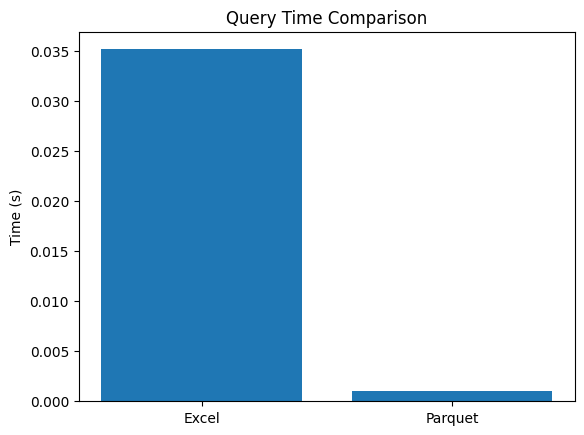

In [17]:
import matplotlib.pyplot as plt

# Visualize time comparison
methods = ['Excel', 'Parquet']
times = [excel_query_time, parquet_query_time]

plt.bar(methods, times)
plt.ylabel('Time (s)')
plt.title('Query Time Comparison')
plt.show()